In [1]:
# import libraries

import random
import math
import scipy
from scipy import optimize
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np

In [2]:
# Grid-Search Part

In [3]:
#Hydraulic head measurements

time = 7 #days
x = [1,11,21,31,41,51,61,71,81,91]#m
head7 = [-0.102488214832666, -0.256410491553362, -0.213669206729949, -0.483401683067052, -0.243068241621553, -0.311217243417387, -0.0644217683867324, -0.0772257784637896, -0.0603414471556082, -0.0334897934057921]


time = 10 #days
x = [1,11,21,31,41,51,61,71,81,91]#m
head10 = [0.443999406954099, 0.707356086196896, 0.303188299476753, 0.434854619375683, 0.399381989561914, 0.0671645178582093, 0.181871866404912, -0.00516329217097165, -0.171663585230874, -0.250824777480790]

time = 25 #days 
x = [1,11,21,31,41,51,61,71,81,91]#m
head25 = [-0.371461399773691, -0.311394297727547, 0.0366151360819552, 0.0611240611861598, 0.306417078570019, 0.283762317677219, 0.192870096397016, 0.0533317081309611, 0.183152310977500, 0.107895715430948]

time = 50 #days
x = [1,11,21,31,41,51,61,71,81,91]#m
head50 = [0.782927857935940, 0.609881412988871, 0.113570122237571, -0.00568864797838272, -0.160172200979472, -0.127889705676206, -0.00387621599071414, 0.00690596442957636, -0.00207478866324770, -0.282535147150022]

time = 180 #days 
x = [1,11,21,31,41,51,61,71,81,91]#m
head180 = [-0.976539641786550, -0.577920831537149, -0.308098743266651, -0.0949955682304036, -0.00877293988316697, 0.0336866533831244, 0.167401153463919, -0.0773048945381665, 0.0780282510863342, -0.167658892045170]

t = [7, 10, 25, 50, 180]
head_obs_list = [head7, head10, head25, head50, head180]
head_obs = np.array(head_obs_list)
#head_obs = np.array(head_obs)
print(head_obs[1,5])
head_obs_array = np.concatenate([head7,head10, head25, head50, head180])

0.0671645178582093


In [4]:
def calculate_hxt_for_one_variable(D_input, A_input, w_input, x_input, t_input):
  fun1 = A_input * math.exp(-x_input * math.sqrt(w_input / (2*D_input)))
  fun2 = math.sin(-x_input * math.sqrt((w_input / (2*D_input)) + ((w_input * t_input) )))
  return fun1 * fun2

In [5]:
#ranges for parameters

# I increased the step size from 4 to 10.

steps= 10 #steps for the grid search method

b = 10 # saturated thicknes in meter
sy = 0.25 # specific yeld 
K_exp_min = 0
K_exp_max = 2
K_skalar = 8.64  #[m/d]
K_exp_lin = np.linspace(K_exp_min, K_exp_max, steps)
K = np.power(K_skalar, K_exp_lin)
D = ((K * b) / sy)
print(D)

A_exp_min = -1
A_exp_max = 1
A_exp_lin = np.linspace(A_exp_min, A_exp_max, steps)
A = np.power(5, A_exp_lin)
print(A)

w_min = (2 * math.pi) / 7
w_max = (2 * math.pi) / 2
w = np.linspace(w_min, w_max, steps)
print(w)



[  40.           64.59131946  104.30096374  168.42342172  271.96727592
  439.16813004  709.16122461 1145.14148018 1849.15497932 2985.984     ]
[0.2        0.28599383 0.40896235 0.58480355 0.83625103 1.19581317
 1.70997595 2.44521285 3.49657893 5.        ]
[0.8975979  1.14693065 1.3962634  1.64559615 1.8949289  2.14426165
 2.3935944  2.64292715 2.8922599  3.14159265]


In [6]:
#go through all combinations, take difference from the measurements and find best parameters for all combinations of x and t

best_current_difference = np.inf

for c,Dlin in enumerate(D):
    for d,Alin in enumerate(A):
         for e,wlin in enumerate(w):
                    h_combinations = []
                    for a,T in enumerate(t):
                        for b,X in enumerate(x):
                            h_combinations.append(calculate_hxt_for_one_variable(Dlin, Alin, wlin, X, T))
                                
                    difference_current = np.sum(np.abs(np.subtract(h_combinations, head_obs_array))) 
                    #print(difference_current)
                    
                    
                    if difference_current <= best_current_difference:  
                        best_current_combination = [Dlin, Alin, wlin,]
                        best_current_difference = difference_current
                        #print(best_current_combination)
print(best_current_combination)
print(best_current_difference)

[104.30096373910334, 0.5848035476425731, 2.39359440273508]
9.946606822004389


In [7]:
h_values_gridsearch = []
for a,T in enumerate(t):
    for b,X in enumerate(x):
        h_values_gridsearch.append(calculate_hxt_for_one_variable(best_current_combination[0],best_current_combination[1],best_current_combination[2], X, T))

In [8]:
print(h_values_gridsearch)
len(h_values_gridsearch)

[0.4283173914225131, -0.15698111524239539, 0.056681795956656955, -0.020193206675666143, 0.0071051604839626374, -0.0024707632415725033, 0.0008494305756293782, -0.0002887345110162787, 9.702082331806923e-05, -3.221273196257791e-05, 0.5167947920027633, 0.07383044758280655, -0.04856445935302242, -0.016621458655869475, 0.0029774295157127427, 0.002438697354460345, 5.001801683488425e-05, -0.00027804933764740883, -5.141950605415032e-05, 2.4212866402660073e-05, -0.5217685818231907, 0.04922659216685143, 0.04827484781317167, -0.018495207430510058, -0.0007940194684799163, 0.0023800534521174867, -0.0005337877312888082, -0.00013874205490647956, 9.92028590916376e-05, -9.848465461879361e-06, 0.5245974850271258, -0.1477957165865018, 0.024639756739701767, 0.002974317421301093, -0.0046271277878848095, 0.002350059349123914, -0.0008277637234861635, 0.00020702540456003532, -2.3606322893376385e-05, -1.0529264015470067e-05, -0.4958838321268324, -0.152223148926447, -0.043442195923104915, -0.011141202572064402, 

50

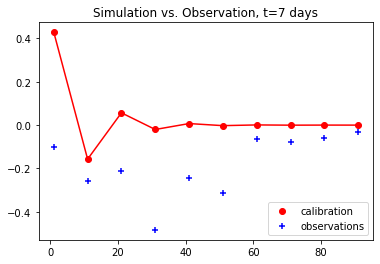

In [9]:
# initialize x and y coordinates
y = h_values_gridsearch[0:10]
z = head7
x = [1,11,21,31,41,51,61,71,81,91]
  
# set the title of a plot
plt.title("Simulation vs. Observation, t=7 days")
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x,z,color='b',marker='+',label="observations")

plt.legend(loc="lower right")

# plot with x and y data
plt.plot(x, y, color='r')

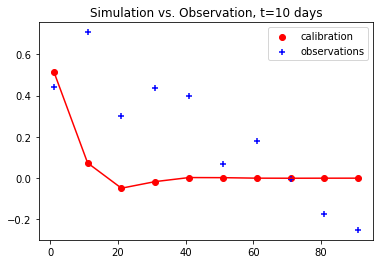

In [10]:
# initialize x and y coordinates
y = h_values_gridsearch[10:20]
z = head10
x = [1,11,21,31,41,51,61,71,81,91]
  
# set the title of a plot
plt.title("Simulation vs. Observation, t=10 days")
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x,z,color='b',marker='+',label="observations")

plt.legend(loc="upper right")

# plot with x and y data
plt.plot(x, y, color='r')

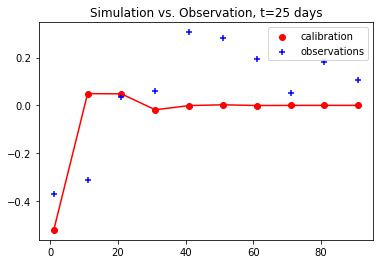

In [11]:
# initialize x and y coordinates
y = h_values_gridsearch[20:30]
z = head25
x = [1,11,21,31,41,51,61,71,81,91]
  
# set the title of a plot
plt.title("Simulation vs. Observation, t=25 days")
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x,z,color='b',marker='+',label="observations")

plt.legend(loc="upper right")

# plot with x and y data
plt.plot(x, y, color='r')

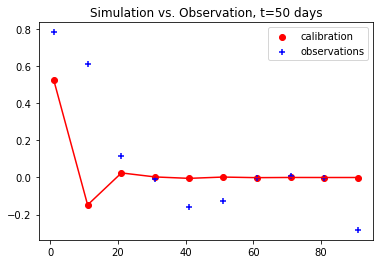

In [12]:
# initialize x and y coordinates
y = h_values_gridsearch[30:40]
z = head50
x = [1,11,21,31,41,51,61,71,81,91]
  
# set the title of a plot
plt.title("Simulation vs. Observation, t=50 days")
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x,z,color='b',marker='+',label="observations")

plt.legend(loc="upper right")

# plot with x and y data
plt.plot(x, y, color='r')

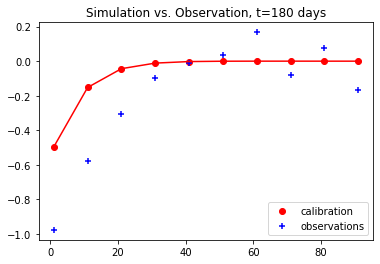

In [13]:
# initialize x and y coordinates
y = h_values_gridsearch[40:50]
z = head180
x = [1,11,21,31,41,51,61,71,81,91]
  
# set the title of a plot
plt.title("Simulation vs. Observation, t=180 days")
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x,z,color='b',marker='+',label="observations")

plt.legend(loc="lower right")

# plot with x and y data
plt.plot(x, y, color='r')

In [14]:
# Monte Carlo Part

In [15]:
#Define the parameters (by using random numbers)
#np.random.seed(321)
steps= 100

K_exp_min = 0
K_exp_max = 2
K_skalar = 8.64  #[m/d]
K_exp_MC = np.random.uniform(K_exp_min, K_exp_max, steps)
K_MC = np.power(K_skalar, K_exp_MC)
D_MC = ((K_MC * b) / sy)
print(D_MC)

A_MC = 5**np.random.uniform(-1, 1, size=steps)
print(A_MC)

w_min = (2 * math.pi) / 7
w_max = (2 * math.pi) / 2
w_MC = np.random.uniform(w_min, w_max, size=steps)
print(w_MC)



[ 137.544812    416.80099609   55.76182413  156.79106822  534.49780124
 1107.90918703  128.00963159  334.7252927    42.03042229 2381.41187694
  347.34063413   37.69955933  713.31069388  607.58097552  180.24990346
  106.94300124  352.81701749 1913.17713918 2489.45506789  842.16100472
   86.2533368    91.05913633   91.07005185   46.99015029   53.00007579
   51.74339173   55.94194374  110.56304927 1005.07875174 1253.99824685
 2536.42566828  292.89586159  565.87519355 2516.71612341 1469.77726153
 2425.65345869   41.59660389  551.26898138 1377.58293136 1618.92983468
  172.64313545 1049.01396492  314.85255437   98.67821448  116.15471373
 1041.25869073  157.27340445  194.03070389 1693.57295471   93.63569048
  190.81728713   69.70502438  490.66894343  322.23921586  341.46539386
 1202.53020733  627.4014896   286.29170058   41.4558613   585.94227344
  444.60046018  838.00316763 1626.75972569   72.92601108  133.1893614
 1900.47831452  664.14040125 1015.03469635 2366.11074564 1133.27011599
  195.5

In [16]:
#go through all combinations, take difference from the measurements and find best parameters for all combinations of x and t

best_current_difference = np.inf

for c,Dlin in enumerate(D_MC):
    for d,Alin in enumerate(A_MC):
         for e,wlin in enumerate(w_MC):
                    h_combinations = []
                    for a,T in enumerate(t):
                        for b,X in enumerate(x):
                            h_combinations.append(calculate_hxt_for_one_variable(Dlin, Alin, wlin, X, T))
                                
                    difference_current = np.sum(np.abs(np.subtract(h_combinations, head_obs_array))) 
                    #print(difference_current)
                    
                    
                    if difference_current <= best_current_difference:  
                        best_current_combination = [Dlin, Alin, wlin]
                        best_current_difference = difference_current
                        #print(best_current_combination)
print(best_current_combination)
print(best_current_difference)
                       
     

KeyboardInterrupt: 

In [18]:
h_values_MC = []
for a,T in enumerate(t):
    for b,X in enumerate(x):
        h_values_MC.append(calculate_hxt_for_one_variable(best_current_combination[0],best_current_combination[1],best_current_combination[2], X, T))

In [19]:
print(h_values_MC)

[0.5238580418777167, -0.30689998837207955, -0.09631942096076666, 0.1854542990158936, -0.04258272382258455, -0.06497010253019202, 0.04984680766295231, 0.006439051434260556, -0.025820064787139687, 0.009118783678133525, 0.5696828128681874, 0.38489840979083956, 0.26004716430295227, 0.17569164779525226, 0.11869791215338456, 0.08019143697539895, 0.05417586385700293, 0.03659962274794371, 0.024725225905345597, 0.016703089330289706, -0.5964211304852789, 0.20667981955912532, 0.1083484108945386, -0.18086492167482104, 0.09444838482594348, 0.00755461415161405, -0.04923807081159571, 0.035753440594069576, -0.0059395818859062826, -0.011631707109907482, 0.5812263879988846, 0.3649545441634909, 0.11341667238025593, -0.049106379940968524, -0.10295250282881627, -0.08455536027004083, -0.04078865299193452, -0.0037085215870409517, 0.014810603584637103, 0.01709396661115642, -0.36933519200968656, -0.3462018921588237, -0.26938128406812367, -0.18268907479554683, -0.10806504363139824, -0.05324054413263712, -0.0179

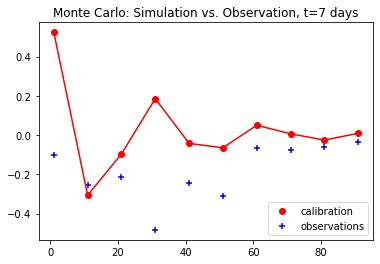

In [20]:
# initialize x and y coordinates
y = h_values_MC[0:10]
z = head7
x = [1,11,21,31,41,51,61,71,81,91]
  
# set the title of a plot
plt.title("Monte Carlo: Simulation vs. Observation, t=7 days")
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x, z,color='b',marker='+',label="observations")

plt.legend(loc="lower right")

# plot with x and y data
plt.plot(x, y, color='r')

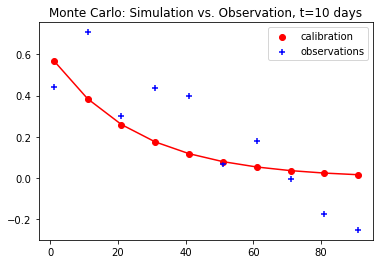

In [21]:
# initialize x and y coordinates
y = h_values_MC[10:20]
z = head10
x = [1,11,21,31,41,51,61,71,81,91]
  
# set the title of a plot
plt.title("Monte Carlo: Simulation vs. Observation, t=10 days")
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x, z,color='b',marker='+',label="observations")

plt.legend(loc="upper right")

# plot with x and y data
plt.plot(x, y, color='r')

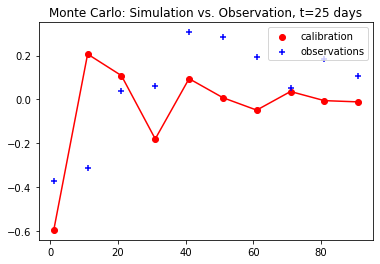

In [22]:
# initialize x and y coordinates
y = h_values_MC[20:30]
z = head25
x = [1,11,21,31,41,51,61,71,81,91]
  
# set the title of a plot
plt.title("Monte Carlo: Simulation vs. Observation, t=25 days")
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x, z,color='b',marker='+',label="observations")

plt.legend(loc="upper right")

# plot with x and y data
plt.plot(x, y, color='r')

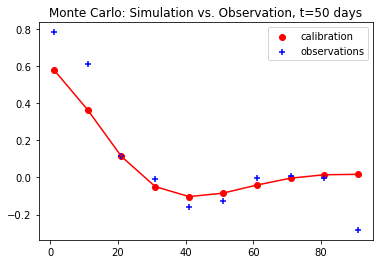

In [23]:
# initialize x and y coordinates
y = h_values_MC[30:40]
z = head50
x = [1,11,21,31,41,51,61,71,81,91]
  
# set the title of a plot
plt.title("Monte Carlo: Simulation vs. Observation, t=50 days")
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x, z,color='b',marker='+',label="observations")

plt.legend(loc="upper right")

# plot with x and y data
plt.plot(x, y, color='r')

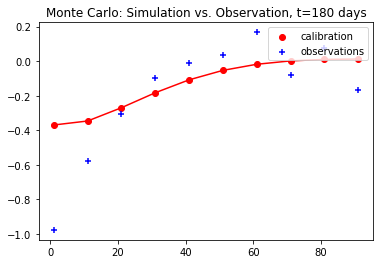

In [24]:
# initialize x and y coordinates
y = h_values_MC[40:50]
z = head180
x = [1,11,21,31,41,51,61,71,81,91]
  
# set the title of a plot
plt.title("Monte Carlo: Simulation vs. Observation, t=180 days")
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x, z,color='b',marker='+',label="observations")

plt.legend(loc="upper right")

# plot with x and y data
plt.plot(x, y, color='r')

In [25]:
# I am still trying to write a loss function that we have to minimize.
# We will use this function as the first parameter in scipy library. For details, please see the references.

'''
Reference:
https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html
https://docs.scipy.org/doc/scipy/reference/optimize.minimize-neldermead.html#optimize-minimize-neldermead
'''


'\nReference:\nhttps://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html\nhttps://docs.scipy.org/doc/scipy/reference/optimize.minimize-neldermead.html#optimize-minimize-neldermead\n'

In [26]:
#Define an objective function that we want to minimize

#initial_parameter = [43.12779010783523, 1.052992921683777, 0.25993138281437717, 1.7942379459878974]
initial_parameter_Grid_Search = [104.30096373910334, 0.5848035476425731, 2.39359440273508]
initial_parameter_Monte_Carlo = [827.0353104672147, 0.6229527504026983, 2.5268491392771577]

def objective_function(parameters):
  D = parameters[0]
  A = parameters[1]
  omega = parameters[2]

  absolute = 0

  for a,T in enumerate(t):
    for b,X in enumerate(x):
      head = calculate_hxt_for_one_variable(D, A, omega, X, T)
      
      absolute += np.abs(head_obs[a,b] - head)

  return absolute

In [27]:
error_Grid_Search = scipy.optimize.minimize(objective_function, initial_parameter_Monte_Carlo, method = 'Nelder-Mead')

Best_D_NM = error_Grid_Search.x[0]
Best_A_NM = error_Grid_Search.x[1]
Best_Omega_NM = error_Grid_Search.x[2]

#print(error)

print(Best_D_NM)
print(Best_A_NM)
print(Best_Omega_NM)

1043.7801374135865
0.6428516758057105
2.5214051199942924


In [28]:
h_combinations = []
for a,T in enumerate(t):
  for b,X in enumerate(x):
    h_combinations.append(calculate_hxt_for_one_variable(Best_D_NM, Best_A_NM, Best_Omega_NM, X, T))
                                
difference_current = np.sum(np.abs(np.subtract(h_combinations, head_obs_array)))
print(difference_current)

8.302344319082811


In [29]:
h_values_NM = []
for a,T in enumerate(t):
  for b,X in enumerate(x):
     h_values_NM.append(calculate_hxt_for_one_variable(Best_D_NM ,Best_A_NM, Best_Omega_NM, X, T))

In [30]:
print(h_values_NM)

[0.541555777498856, -0.3461349329548723, -0.08055724794555195, 0.21688346826601707, -0.07866183548741475, -0.06512227735300893, 0.07494539109676082, -0.008575363623299196, -0.03270079300123414, 0.022201076197859666, 0.5914701020361346, 0.4240526074018854, 0.30318829810281955, 0.21619185441482794, 0.15375244778079938, 0.10906260194690968, 0.07716316650634188, 0.05445378110258808, 0.038329004927115516, 0.026909178587779855, -0.6186226363274547, 0.2582754285520714, 0.06942609303276188, -0.19321151004692516, 0.1443622266481493, -0.03733039235575128, -0.037455868527738134, 0.05333170779334094, -0.030719399205725844, 0.0018467058624081255, 0.6041762477172425, 0.3661129593871411, 0.05297215783109161, -0.13141510390640004, -0.15367398032277796, -0.08320945101066306, -0.003876183582392866, 0.03777158373184831, 0.03850561501916684, 0.018432546534482914, -0.39392584418179827, -0.41983037076214513, -0.296369282214655, -0.13847748629151418, -0.01469709371750738, 0.05184847018063503, 0.0682133838438

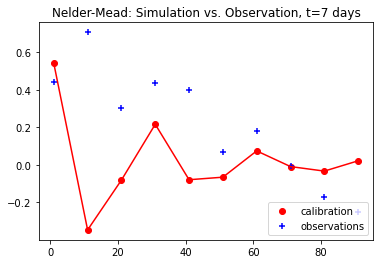

In [31]:
# initialize x and y coordinates
y = h_values_NM[0:10]
z = head10
x = [1,11,21,31,41,51,61,71,81,91]
  
# set the title of a plot
plt.title("Nelder-Mead: Simulation vs. Observation, t=7 days")
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x, z,color='b',marker='+',label="observations")

plt.legend(loc="lower right")

# plot with x and y data
plt.plot(x, y, color='r')

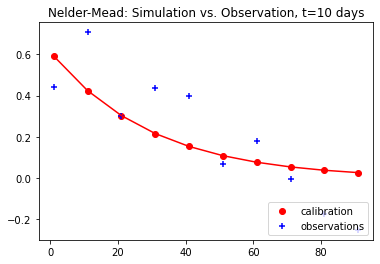

In [32]:
# initialize x and y coordinates
y = h_values_NM[10:20]
z = head10
x = [1,11,21,31,41,51,61,71,81,91]
  
# set the title of a plot
plt.title("Nelder-Mead: Simulation vs. Observation, t=10 days")
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x, z,color='b',marker='+',label="observations")

plt.legend(loc="lower right")

# plot with x and y data
plt.plot(x, y, color='r')

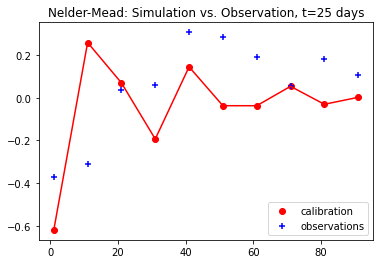

In [33]:
# initialize x and y coordinates
y = h_values_NM[20:30]
z = head25
x = [1,11,21,31,41,51,61,71,81,91]
  
# set the title of a plot
plt.title("Nelder-Mead: Simulation vs. Observation, t=25 days")
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x, z,color='b',marker='+',label="observations")

plt.legend(loc="lower right")

# plot with x and y data
plt.plot(x, y, color='r')

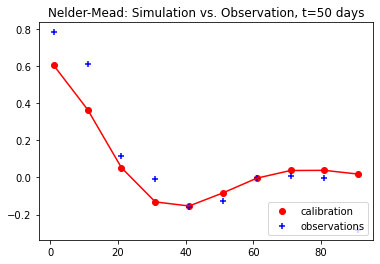

In [34]:
# initialize x and y coordinates
y = h_values_NM[30:40]
z = head50
x = [1,11,21,31,41,51,61,71,81,91]
  
# set the title of a plot
plt.title("Nelder-Mead: Simulation vs. Observation, t=50 days")
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x, z,color='b',marker='+',label="observations")

plt.legend(loc="lower right")

# plot with x and y data
plt.plot(x, y, color='r')

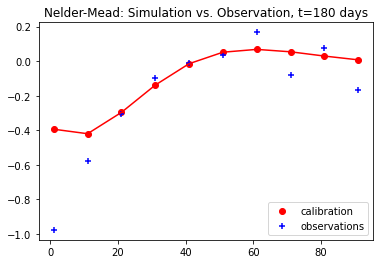

In [35]:
# initialize x and y coordinates
y = h_values_NM[40:50]
z = head180
x = [1,11,21,31,41,51,61,71,81,91]
  
# set the title of a plot
plt.title("Nelder-Mead: Simulation vs. Observation, t=180 days")
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x, z,color='b',marker='+',label="observations")

plt.legend(loc="lower right")

# plot with x and y data
plt.plot(x, y, color='r')

In [4]:
times = [7, 10, 25, 50, 180]
distances = [1, 11, 21, 31, 41, 51, 61, 71, 81, 91]
        
simulation = np.zeros(len(times), len(distances))

D=1
A=1
w=1
for t in times:
    for d in distances:
        calculate_hxt_for_one variable(D, A, w, d, t)

SyntaxError: invalid syntax (<ipython-input-4-7449679e7059>, line 11)